 Copyright (C)                                                       
 2016 - 2019 Pinard Liu(liujianping-ok@163.com) 
 
 https://www.cnblogs.com/pinard
 
 Permission given to modify the code as long as you keep this declaration at the top                               

用scikit-learn和pandas学习线性回归
https://www.cnblogs.com/pinard/p/6016029.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [7]:
# read_csv里面的参数是csv在你电脑上的路径，此处csv文件放在notebook运行目录下面的CCPP目录里
data = pd.read_csv('../data/CCPP/ccpp.csv')

In [3]:
#读取前五行数据，如果是最后五行，用data.tail()
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
data.tail()

,AT,V,AP,RH,PE
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93
9567,23.68,51.30,1011.86,71.24,451.67


In [10]:
data.shape

(9568, 5)

In [11]:
X = data[['AT', 'V', 'AP', 'RH']]
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [12]:
y = data[['PE']]
y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [16]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(7176, 4)
(7176, 1)
(2392, 4)
(2392, 1)


In [17]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print linreg.intercept_
print linreg.coef_

[447.06297099]
[[-1.97376045 -0.23229086  0.0693515  -0.15806957]]


In [20]:
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y_test, y_pred)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MSE: 20.08040120207389
RMSE: 4.481116066570235


In [26]:
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
#模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y_test, y_pred)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred))

MSE: 23.2089074701
RMSE: 4.81756239919


In [21]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=9)
# 用scikit-learn计算MSE
print "MSE:",metrics.mean_squared_error(y, predicted)
# 用scikit-learn计算RMSE
print "RMSE:",np.sqrt(metrics.mean_squared_error(y, predicted))

MSE: 20.79279378875543
RMSE: 4.559911598787353


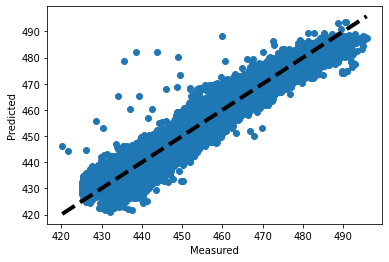

In [22]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()